### О задании

В этом задании вам предстоит предсказывать год выпуска песни (**задача регрессии**) по некоторым звуковым признакам: [данные](https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd). В ячейках ниже находится код для загрузки данных. Обратите внимание, что обучающая и тестовая выборки располагаются в одном файле, поэтому НЕ меняйте ячейку, в которой производится деление данных.

In [1]:
import random

import numpy as np
import pandas as pd
import torch
from torch import nn

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import root_mean_squared_error

In [ ]:
# %conda install wget

In [3]:
!wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

--2024-12-30 17:32:27--  https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘data.txt.zip’

data.txt.zip            [                 <=>] 201.24M  60.1MB/s    in 3.4s    

2024-12-30 17:32:31 (59.2 MB/s) - ‘data.txt.zip’ saved [211011981]



In [227]:
df = pd.read_csv("data.txt.zip", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515345 entries, 0 to 515344
Data columns (total 91 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       515345 non-null  int64  
 1   1       515345 non-null  float64
 2   2       515345 non-null  float64
 3   3       515345 non-null  float64
 4   4       515345 non-null  float64
 5   5       515345 non-null  float64
 6   6       515345 non-null  float64
 7   7       515345 non-null  float64
 8   8       515345 non-null  float64
 9   9       515345 non-null  float64
 10  10      515345 non-null  float64
 11  11      515345 non-null  float64
 12  12      515345 non-null  float64
 13  13      515345 non-null  float64
 14  14      515345 non-null  float64
 15  15      515345 non-null  float64
 16  16      515345 non-null  float64
 17  17      515345 non-null  float64
 18  18      515345 non-null  float64
 19  19      515345 non-null  float64
 20  20      515345 non-null  float64
 21  21      51

пропуски отсутствуют

In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


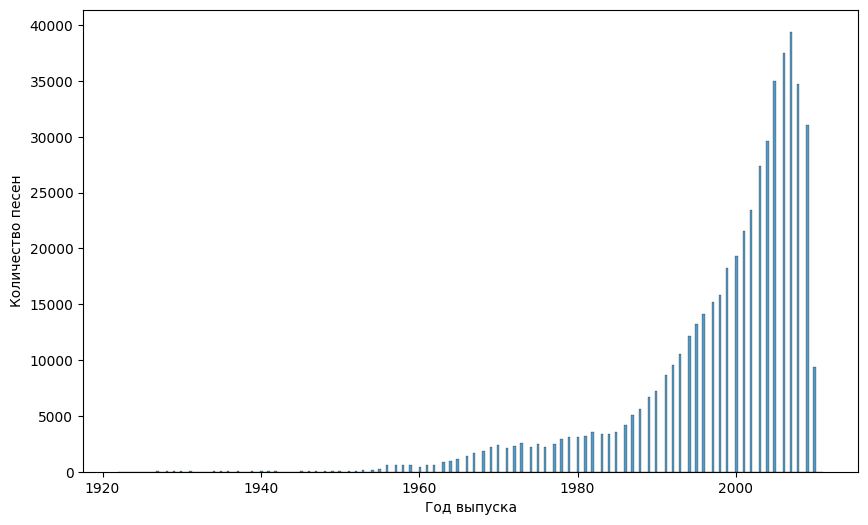

In [90]:
plt.figure(figsize=(10, 6))
sns.histplot(df[0])
plt.xlabel('Год выпуска')
plt.ylabel('Количество песен')
plt.show()

У нас 90 признаков (12 = timbre average, 78 = timbre covariance), что достаточно много. Возможно, стоит применить методы снижения размерности (PCA).  
Данные несбалансированы по годам.  
Разброс значений у признаков сильно отличается, поэтому их нужно масштабировать.

In [228]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = 463715
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

## Задание 0. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Мы будем использовать RMSE как метрику качества. Для самого первого бейзлайна обучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

In [ ]:
from sklearn.dummy import DummyRegressor

# обучение DummyRegressor (константный прогноз)
dummy_regressor = DummyRegressor(strategy='mean')
dummy_regressor.fit(X_train, y_train)
ypred_dummy = dummy_regressor.predict(X_test)

rmse_dummy = root_mean_squared_error(y_test, ypred_dummy)
print(f'RMSE {rmse_dummy}')

RMSE 10.85246390513634


In [229]:
# масштабирование признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# PCA
# pca = PCA(n_components=0.9)
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
# print(f'Количество признаков после PCA {pca.n_components_}')

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV

n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

ridge_cv = RidgeCV(alphas=ridge_alphas,
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X_train, y_train)
ridge_cv.alpha_

382.7494478516315

In [ ]:
# обучение Ridge
ridge = Ridge(alpha=ridge_cv.alpha_)
ridge.fit(X_train, y_train)

ypred_ridge = ridge.predict(X_test)

rmse_ridge = root_mean_squared_error(y_test, ypred_ridge)
print(f'RMSE {rmse_ridge}')

RMSE 9.51021278851268


## Задание 1. (максимум 10 баллов)

Реализуйте обучение и тестирование нейронной сети для предоставленного вам набора данных. Соотношение между полученным значением метрики на тестовой выборке и баллами за задание следующее:

- $\text{RMSE} \le 9.00 $ &mdash; 4 балла
- $\text{RMSE} \le 8.90 $ &mdash; 6 баллов
- $\text{RMSE} \le 8.80 $ &mdash; 8 баллов
- $\text{RMSE} \le 8.75 $ &mdash; 10 баллов

Есть несколько правил, которых вам нужно придерживаться:

- Весь пайплайн обучения должен быть написан на PyTorch. При этом вы можете пользоваться другими библиотеками (`numpy`, `sklearn` и пр.), но только для обработки данных. То есть как угодно трансформировать данные и считать метрики с помощью этих библиотек можно, а импортировать модели из `sklearn` и выбивать с их помощью требуемое качество &mdash; нельзя. Также нельзя пользоваться библиотеками, для которых сам PyTorch является зависимостью.

- Мы никак не ограничиваем ваш выбор архитектуры модели, но скорее всего вам будет достаточно полносвязной нейронной сети.

- Для обучения запрещается использовать какие-либо иные данные, кроме обучающей выборки.

- Ансамблирование моделей запрещено.

### Полезные советы:

- Очень вряд ли, что у вас с первого раза получится выбить качество на 10 баллов, поэтому пробуйте разные архитектуры, оптимизаторы и значения гиперпараметров. В идеале при запуске каждого нового эксперимента вы должны менять что-то одно, чтобы точно знать, как этот фактор влияет на качество.

- Не забудьте, что для улучшения качества модели вам поможет **нормировка таргета**.

- Тот факт, что мы занимаемся глубинным обучением, не означает, что стоит забывать про приемы, использующиеся в классическом машинном обучении. Так что обязательно проводите исследовательский анализ данных, отрисовывайте нужные графики и не забывайте про масштабирование и подбор гиперпараметров.

- Вы наверняка столкнетесь с тем, что ваша нейронная сеть будет сильно переобучаться. Для нейросетей существуют специальные методы регуляризации, например, dropout ([статья](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)) и weight decay ([блогпост](https://towardsdatascience.com/weight-decay-l2-regularization-90a9e17713cd)). Они, разумеется, реализованы в PyTorch. Попробуйте поэкспериментировать с ними.

- Если вы чего-то не знаете, не гнушайтесь гуглить. В интернете очень много полезной информации, туториалов и советов по глубинному обучению в целом и по PyTorch в частности. Но не забывайте, что за скатанный код без ссылки на источник придется ответить по всей строгости!

- Если вы сразу реализуете обучение на GPU, то у вас будет больше времени на эксперименты, так как любые вычисления будут работать быстрее. Google Colab предоставляет несколько GPU-часов (обычно около 8-10) в сутки бесплатно.

- Чтобы отладить код, можете обучаться на небольшой части данных или даже на одном батче. Если лосс на обучающей выборке не падает, то что-то точно идет не так!

- Пользуйтесь утилитами, которые вам предоставляет PyTorch (например, Dataset и Dataloader). Их специально разработали для упрощения разработки пайплайна обучения.

- Скорее всего вы захотите отслеживать прогресс обучения. Для создания прогресс-баров есть удобная библиотека `tqdm`.

- Быть может, вы захотите, чтобы графики рисовались прямо во время обучения. Можете воспользоваться функцией [clear_output](http://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.clear_output), чтобы удалять старый график и рисовать новый на его месте.

**ОБЯЗАТЕЛЬНО** рисуйте графики зависимости лосса/метрики на обучающей и тестовой выборках в зависимости от времени обучения. Если обучение занимает относительно небольшое число эпох, то лучше рисовать зависимость от номера шага обучения, если же эпох больше, то рисуйте зависимость по эпохам. Если проверяющий не увидит такого графика для вашей лучшей модели, то он в праве снизить баллы за задание.

**ВАЖНО!** Ваше решение должно быть воспроизводимым. Если это не так, то проверяющий имеет право снизить баллы за задание. Чтобы зафиксировать random seed, воспользуйтесь функцией из ячейки ниже.



In [169]:
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

Вы можете придерживаться любой адекватной струкуры кода, но мы советуем воспользоваться следующими сигнатурами функций. Лучше всего, если вы проверите ваши предсказания ассертом: так вы убережете себя от разных косяков, например, что вектор предсказаний состоит из всего одного числа. В любом случае, внимательно следите за тем, для каких тензоров вы считаете метрику RMSE. При случайном или намеренном введении в заблуждение проверяющие очень сильно разозлятся.

In [ ]:
train_set = None  # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
train_loader = None  # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

test_set = None  # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
test_loader = None  # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

model = None  # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
optimizer = None  # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
criterion = None  # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

In [ ]:
def train(model, optimizer, criterion, train_loader, test_loader):
    """
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
        test_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)
    """
    # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
    raise NotImplementedError


def test(model, criterion, test_loader):
    """
    params:
        model - torch.nn.Module to be evaluated on test set
        criterion - loss function from torch.nn
        test_loader - torch.utils.data.Dataloader with test set
    ----------
    returns:
        predicts - torch.tensor with shape (len(test_loader.dataset), ),
                   which contains predictions for test objects
    """
    # YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
    predicts = torch.ones(len(test_loader.dataset))
    return predicts

In [ ]:
assert test(model, criterion, test_loader).shape[0] == y_test.shape[0]

# Эксперимент 1

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils
from torch.utils.data import Dataset, DataLoader, TensorDataset
from tqdm import tqdm

In [230]:
set_random_seed(42)

In [231]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [232]:
BATCH_SIZE = 128
EPOCHS = 50
LEARNING_RATE = 0.001

In [233]:
def create_data_loader(X_train, y_train, X_test, y_test):
    train_tensor = TensorDataset(torch.tensor(X_train.astype(np.float32)), torch.tensor(y_train.astype(np.float32)).unsqueeze(1))
    train_loader = DataLoader(dataset=train_tensor,
                                         batch_size=BATCH_SIZE,
                                         shuffle=True)

    test_tensor = TensorDataset(torch.tensor(X_test.astype(np.float32)), torch.tensor(y_test.astype(np.float32)).unsqueeze(1))
    test_loader = DataLoader(dataset=test_tensor,
                                        batch_size=BATCH_SIZE,
                                        shuffle=False)
    return train_loader, test_loader

In [234]:
train_loader, test_loader = create_data_loader(X_train, y_train, X_test, y_test)

In [37]:
class ModelOne(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(90, 64)
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(64, 32)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.output(x)
        return x

In [38]:
model = ModelOne().to(device)

In [39]:
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.MSELoss()

In [40]:
def train(model, optimizer, criterion, train_loader, test_loader):
    train_losses = []
    train_rmses = []
    valid_losses = []
    valid_rmses = []

    for epoch in tqdm(range(EPOCHS)):  # добавил tqdm для прогресс-бара
        model.train()
        train_loss = 0.0
        train_samples = 0
        for features, label in train_loader:
            features = features.to(device) # перемещаем данные на девайс
            label = label.to(device)

            optimizer.zero_grad()
            output = model(features) # получаем предсказания модели
            loss = criterion(output, label) # считаем лосс
            loss.backward() # считаем градиенты
            optimizer.step() # обновляем веса

            batch_size = features.size(0)
            train_loss += loss.item() * batch_size
            train_samples += batch_size

        avg_train_loss = train_loss / train_samples
        avg_train_rmse = np.sqrt(avg_train_loss)

        train_losses.append(avg_train_loss)
        train_rmses.append(avg_train_rmse)

        if epoch % 10 == 0:
            print(f'EPOCH {epoch}, train_loss: {avg_train_loss}, train_rmse: {avg_train_rmse}')

        model.eval()
        valid_loss = 0
        valid_samples = 0
        with torch.no_grad():
            for features, label in test_loader:
                features = features.to(device)
                label = label.to(device)

                output = model(features)
                loss = criterion(output, label)

                batch_size = features.size(0)
                valid_loss += loss.item() * batch_size
                valid_samples += batch_size

        avg_valid_loss = valid_loss / valid_samples
        avg_valid_rmse = np.sqrt(avg_valid_loss)

        valid_losses.append(avg_valid_loss)
        valid_rmses.append(avg_valid_rmse)

        if epoch % 10 == 0:
            print(f'EPOCH {epoch}, valid_loss: {avg_valid_loss}, valid_rmse: {avg_valid_rmse}')

    return train_losses, train_rmses, valid_losses, valid_rmses

In [41]:
train_losses, train_rmses, valid_losses, valid_rmses = train(model, optimizer, criterion, train_loader, test_loader)

  0%|          | 0/50 [00:00<?, ?it/s]

EPOCH 0, train_loss: 453564.3749615621, train_rmse: 673.4718813443974


  2%|▏         | 1/50 [00:18<15:07, 18.51s/it]

EPOCH 0, valid_loss: 34770.892099736106, valid_rmse: 186.4695473790187


 20%|██        | 10/50 [01:54<06:59, 10.48s/it]

EPOCH 10, train_loss: 105.47677872603903, train_rmse: 10.270188835948394


 22%|██▏       | 11/50 [02:04<06:47, 10.46s/it]

EPOCH 10, valid_loss: 95.595055942214, valid_rmse: 9.777272418328845


 40%|████      | 20/50 [03:37<05:09, 10.32s/it]

EPOCH 20, train_loss: 102.60716268205171, train_rmse: 10.129519370732835


 42%|████▏     | 21/50 [03:47<04:58, 10.30s/it]

EPOCH 20, valid_loss: 125.95621610024907, valid_rmse: 11.223021700961336


 60%|██████    | 30/50 [05:17<03:21, 10.09s/it]

EPOCH 30, train_loss: 99.29070638472736, train_rmse: 9.964472208036277


 62%|██████▏   | 31/50 [05:28<03:12, 10.11s/it]

EPOCH 30, valid_loss: 101.0225851352654, valid_rmse: 10.05099921078822


 80%|████████  | 40/50 [06:58<01:40, 10.09s/it]

EPOCH 40, train_loss: 95.95141346760154, train_rmse: 9.79547923623962


 82%|████████▏ | 41/50 [07:08<01:31, 10.13s/it]

EPOCH 40, valid_loss: 95.41831207098066, valid_rmse: 9.768229730661572


100%|██████████| 50/50 [08:54<00:00, 10.69s/it]


In [45]:
rmse = valid_rmses[-1]
print(f'RMSE {rmse:.4f}')

RMSE 9.6050


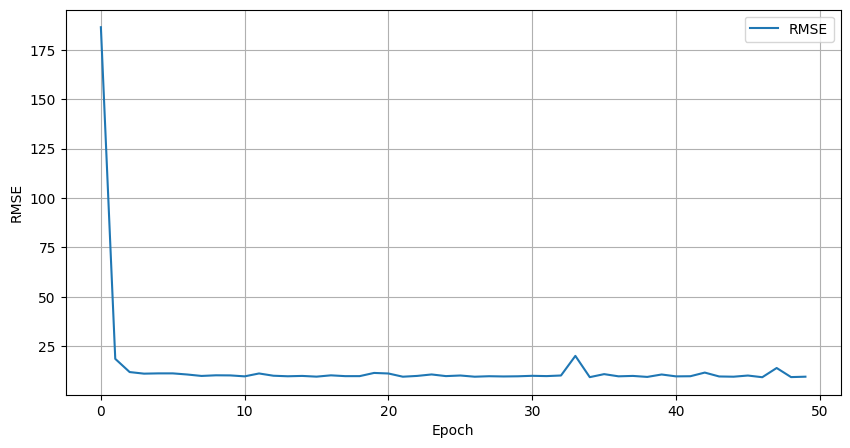

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(valid_rmses, label='RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()

# Эксперимент 2

In [99]:
BATCH_SIZE = 128
EPOCHS = 50
LEARNING_RATE = 0.001

In [100]:
class ModelTwo(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(90, 64)
        self.bn1 = nn.BatchNorm1d(64) # Batch Norm
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32) # Batch Norm
        self.act2 = nn.ReLU()
        self.output = nn.Linear(32, 1)

    def forward(self, x):
        x = self.act1(self.bn1(self.layer1(x)))
        x = self.act2(self.bn2(self.layer2(x)))
        x = self.output(x)
        return x

In [101]:
model = ModelTwo().to(device)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.MSELoss()

In [102]:
train_losses, train_rmses, valid_losses, valid_rmses = train(model, optimizer, criterion, train_loader, test_loader)

  0%|          | 0/50 [00:00<?, ?it/s]

EPOCH 0, train_loss: 2828871.1120615574, train_rmse: 1681.9248235463906


  2%|▏         | 1/50 [00:11<09:21, 11.46s/it]

EPOCH 0, valid_loss: 1206545.5790431919, valid_rmse: 1098.4286863712146


 20%|██        | 10/50 [02:26<09:43, 14.59s/it]

EPOCH 10, train_loss: 181.731194398304, train_rmse: 13.480771283509858


 22%|██▏       | 11/50 [02:39<09:09, 14.08s/it]

EPOCH 10, valid_loss: 152.63585483182337, valid_rmse: 12.354588412076842


 40%|████      | 20/50 [04:42<06:21, 12.70s/it]

EPOCH 20, train_loss: 124.57263807709697, train_rmse: 11.161211317643662


 42%|████▏     | 21/50 [04:54<05:58, 12.35s/it]

EPOCH 20, valid_loss: 146.8267157397805, valid_rmse: 12.117207423320792


 60%|██████    | 30/50 [06:41<03:53, 11.69s/it]

EPOCH 30, train_loss: 103.77270453605571, train_rmse: 10.186888854604025


 62%|██████▏   | 31/50 [06:53<03:41, 11.64s/it]

EPOCH 30, valid_loss: 103.46881584538384, valid_rmse: 10.17196224164167


 80%|████████  | 40/50 [08:38<01:55, 11.55s/it]

EPOCH 40, train_loss: 93.56823917089187, train_rmse: 9.673067722852553


 82%|████████▏ | 41/50 [08:49<01:43, 11.55s/it]

EPOCH 40, valid_loss: 112.26975998273544, valid_rmse: 10.595742540413836


100%|██████████| 50/50 [10:33<00:00, 12.68s/it]


In [103]:
rmse = valid_rmses[-1]
print(f'RMSE {rmse:.4f}')

RMSE 9.3876


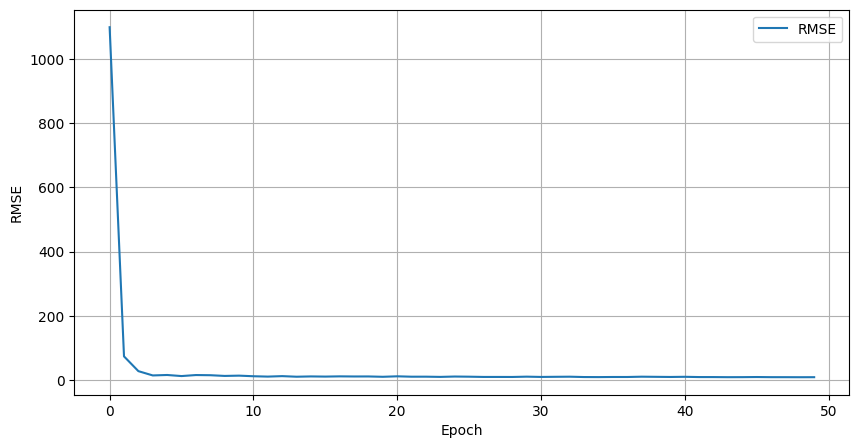

In [104]:
plt.figure(figsize=(10, 5))
plt.plot(valid_rmses, label='RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()

# Эксперимент 3

In [119]:
BATCH_SIZE = 128
EPOCHS = 50
LEARNING_RATE = 0.001

In [120]:
class ModelThree(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(90, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.1)
        self.layer2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.act2 = nn.ReLU()
        # self.dropout2 = nn.Dropout(0.1)
        self.output = nn.Linear(64, 1)

    def forward(self, x):
        x = self.dropout1(self.act1(self.bn1(self.layer1(x))))
        x = self.act2(self.bn2(self.layer2(x)))
        x = self.output(x)
        return x

In [121]:
model = ModelThree().to(device)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.MSELoss()

In [122]:
train_losses, train_rmses, valid_losses, valid_rmses = train(model, optimizer, criterion, train_loader, test_loader)

  0%|          | 0/50 [00:00<?, ?it/s]

EPOCH 0, train_loss: 2159311.1022297507, train_rmse: 1469.4594591991133


  2%|▏         | 1/50 [00:11<09:40, 11.85s/it]

EPOCH 0, valid_loss: 264636.5194654271, valid_rmse: 514.4283424009869


 20%|██        | 10/50 [01:57<07:48, 11.72s/it]

EPOCH 10, train_loss: 216.15001128044435, train_rmse: 14.702041058317187


 22%|██▏       | 11/50 [02:09<07:38, 11.76s/it]

EPOCH 10, valid_loss: 121.05356388213951, valid_rmse: 11.002434452526382


 40%|████      | 20/50 [03:56<05:53, 11.79s/it]

EPOCH 20, train_loss: 98.19658998035469, train_rmse: 9.909419255453605


 42%|████▏     | 21/50 [04:07<05:42, 11.82s/it]

EPOCH 20, valid_loss: 85.53697057971884, valid_rmse: 9.248619928384928


 60%|██████    | 30/50 [05:54<03:56, 11.84s/it]

EPOCH 30, train_loss: 83.56327900225597, train_rmse: 9.141295258455225


 62%|██████▏   | 31/50 [06:06<03:45, 11.84s/it]

EPOCH 30, valid_loss: 93.83964769295798, valid_rmse: 9.687086646301765


 80%|████████  | 40/50 [07:52<01:58, 11.85s/it]

EPOCH 40, train_loss: 80.9728705832223, train_rmse: 8.998492683956703


 82%|████████▏ | 41/50 [08:04<01:46, 11.81s/it]

EPOCH 40, valid_loss: 79.08989534512892, valid_rmse: 8.893249987778873


100%|██████████| 50/50 [09:50<00:00, 11.81s/it]


In [123]:
rmse = valid_rmses[-1]
print(f'RMSE {rmse:.4f}')

RMSE 8.9349


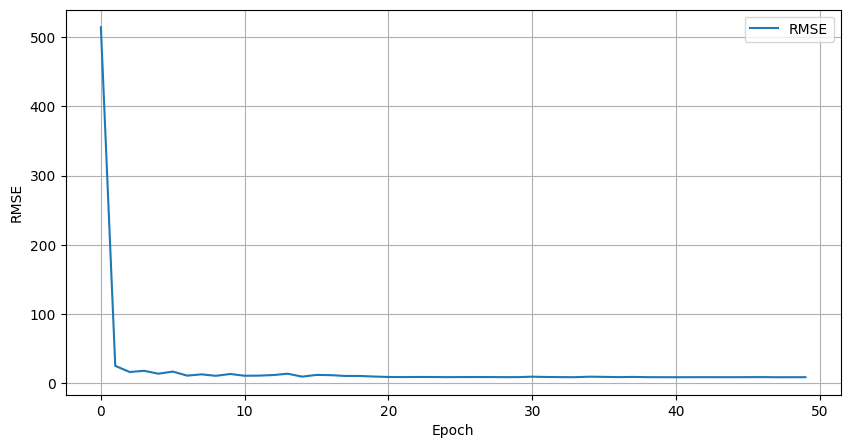

In [124]:
plt.figure(figsize=(10, 5))
plt.plot(valid_rmses, label='RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()

# Эксперимент 4

In [146]:
BATCH_SIZE = 128
EPOCHS = 50
LEARNING_RATE = 0.001

In [149]:
class ModelFour(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(90, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.act1 = nn.LeakyReLU() # заменил ReLU на LeakyReLU
        self.dropout1 = nn.Dropout(0.1)
        self.layer2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.act2 = nn.LeakyReLU()
        self.output = nn.Linear(64, 1)

    def forward(self, x):
        x = self.dropout1(self.act1(self.bn1(self.layer1(x))))
        x = self.act2(self.bn2(self.layer2(x)))
        x = self.output(x)
        return x

In [150]:
model = ModelFour().to(device)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.MSELoss()

In [151]:
train_losses, train_rmses, valid_losses, valid_rmses = train(model, optimizer, criterion, train_loader, test_loader)

  0%|          | 0/50 [00:00<?, ?it/s]

EPOCH 0, train_loss: 2162401.2838043035, train_rmse: 1470.5105520887307


  2%|▏         | 1/50 [00:12<10:13, 12.51s/it]

EPOCH 0, valid_loss: 260944.57445162695, valid_rmse: 510.82734309316976


 20%|██        | 10/50 [02:00<08:03, 12.09s/it]

EPOCH 10, train_loss: 218.18130433282573, train_rmse: 14.770961523639066


 22%|██▏       | 11/50 [02:12<07:47, 11.99s/it]

EPOCH 10, valid_loss: 165.28853740023476, valid_rmse: 12.856458975948033


 40%|████      | 20/50 [03:56<05:50, 11.68s/it]

EPOCH 20, train_loss: 93.40583980739596, train_rmse: 9.664669668819311


 42%|████▏     | 21/50 [04:07<05:37, 11.64s/it]

EPOCH 20, valid_loss: 84.54234950028486, valid_rmse: 9.194691376021538


 60%|██████    | 30/50 [05:52<03:52, 11.63s/it]

EPOCH 30, train_loss: 82.94830025718497, train_rmse: 9.107595745156072


 62%|██████▏   | 31/50 [06:04<03:42, 11.70s/it]

EPOCH 30, valid_loss: 87.37805057668233, valid_rmse: 9.347622723274743


 80%|████████  | 40/50 [07:48<01:56, 11.62s/it]

EPOCH 40, train_loss: 80.74660803231343, train_rmse: 8.98591164169298


 82%|████████▏ | 41/50 [08:00<01:44, 11.64s/it]

EPOCH 40, valid_loss: 79.49985207242372, valid_rmse: 8.916268954693086


100%|██████████| 50/50 [09:45<00:00, 11.70s/it]


In [152]:
rmse = valid_rmses[-1]
print(f'RMSE {rmse:.4f}')

RMSE 8.9099


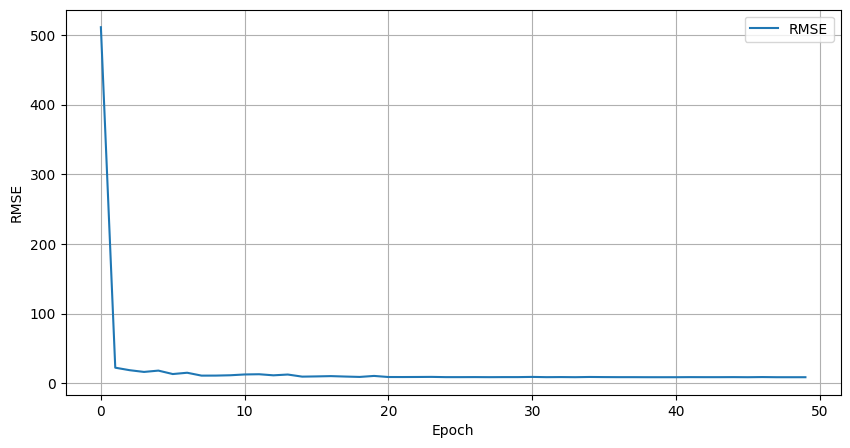

In [153]:
plt.figure(figsize=(10, 5))
plt.plot(valid_rmses, label='RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()

# Эксперимент 5

In [235]:
BATCH_SIZE = 128
EPOCHS = 70 # увеличим количество эпох, т.к. будем использовать early stopping
LEARNING_RATE = 0.01 # увеличил

In [236]:
class ModelFive(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(90, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.act1 = nn.LeakyReLU()
        self.dropout = nn.Dropout(0.1)

        self.layer2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.act2 = nn.LeakyReLU()

        self.layer3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.act3 = nn.LeakyReLU()

        self.output = nn.Linear(64, 1)

    def forward(self, x):
        x = self.dropout(self.act1(self.bn1(self.layer1(x))))
        x = self.act2(self.bn2(self.layer2(x)))
        x = self.act3(self.bn3(self.layer3(x)))
        x = self.output(x)
        return x

In [237]:
model = ModelFive().to(device)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.MSELoss()

In [238]:
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.8)

In [239]:
# добавил scheduler и early stopping
def train(model, optimizer, criterion, train_loader, test_loader, scheduler=None, patience=10):
    train_losses = []
    train_rmses = []
    valid_losses = []
    valid_rmses = []
    lr_history = []

    best_valid_rmse = np.inf
    epochs_no_improve = 0

    for epoch in tqdm(range(EPOCHS)):
        model.train()
        train_loss = 0.0
        num_train_samples = 0
        for features, label in train_loader:
            features = features.to(device)
            label = label.to(device)

            optimizer.zero_grad()
            output = model(features)
            loss = criterion(output, label)
            loss.backward()
            optimizer.step()

            batch_size = features.size(0)
            train_loss += loss.item() * batch_size
            num_train_samples += batch_size

        avg_train_loss = train_loss / num_train_samples
        avg_train_rmse = np.sqrt(avg_train_loss)

        train_losses.append(avg_train_loss)
        train_rmses.append(avg_train_rmse)

        model.eval()
        valid_loss = 0
        num_valid_samples = 0
        with torch.no_grad():
            for features, label in test_loader:
                features = features.to(device)
                label = label.to(device)

                output = model(features)
                loss = criterion(output, label)

                batch_size = features.size(0)
                valid_loss += loss.item() * batch_size
                num_valid_samples += batch_size

        avg_valid_loss = valid_loss / num_valid_samples
        avg_valid_rmse = np.sqrt(avg_valid_loss)

        valid_losses.append(avg_valid_loss)
        valid_rmses.append(avg_valid_rmse)

        # вызываем scheduler после каждой эпохи
        if scheduler:
            scheduler.step()
            lr_history.append(scheduler.get_last_lr()[0])

        if epoch % 10 == 0:
            print(f'EPOCH {epoch}, train_loss: {avg_train_loss:.4f}, train_rmse: {avg_train_rmse:.4f}, valid_loss: {avg_valid_loss:.4f}, valid_rmse: {avg_valid_rmse:.4f}, lr: {scheduler.get_last_lr()[0]}')

        # Early stopping
        if avg_valid_rmse < best_valid_rmse:
            best_valid_rmse = avg_valid_rmse
            epochs_no_improve = 0
            # сохраняем лучшие веса модели
            best_model_state = model.state_dict()
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print(f'Early stopping at epoch {epoch}')
                break

    # загружаем лучшие веса
    model.load_state_dict(best_model_state)

    return train_losses, train_rmses, valid_losses, valid_rmses, lr_history

In [19]:
train_losses, train_rmses, valid_losses, valid_rmses, lr_history = train(model, optimizer, criterion, train_loader, test_loader, scheduler, patience=10)

  1%|▏         | 1/70 [00:15<17:55, 15.59s/it]

EPOCH 0, train_loss: 216438.8295, train_rmse: 465.2299, valid_loss: 717.0634, valid_rmse: 26.7780, lr: 0.01


 16%|█▌        | 11/70 [02:37<13:26, 13.67s/it]

EPOCH 10, train_loss: 88.8015, train_rmse: 9.4235, valid_loss: 223.0542, valid_rmse: 14.9350, lr: 0.01


 30%|███       | 21/70 [05:07<11:14, 13.77s/it]

EPOCH 20, train_loss: 79.1105, train_rmse: 8.8944, valid_loss: 83.1578, valid_rmse: 9.1191, lr: 0.008


 44%|████▍     | 31/70 [07:34<10:06, 15.54s/it]

EPOCH 30, train_loss: 76.3847, train_rmse: 8.7398, valid_loss: 81.7794, valid_rmse: 9.0432, lr: 0.008


 54%|█████▍    | 38/70 [09:26<07:57, 14.92s/it]

Early stopping at epoch 38


In [21]:
rmse = valid_rmses[-1]
print(f'RMSE {rmse:.4f}')

RMSE 8.8299


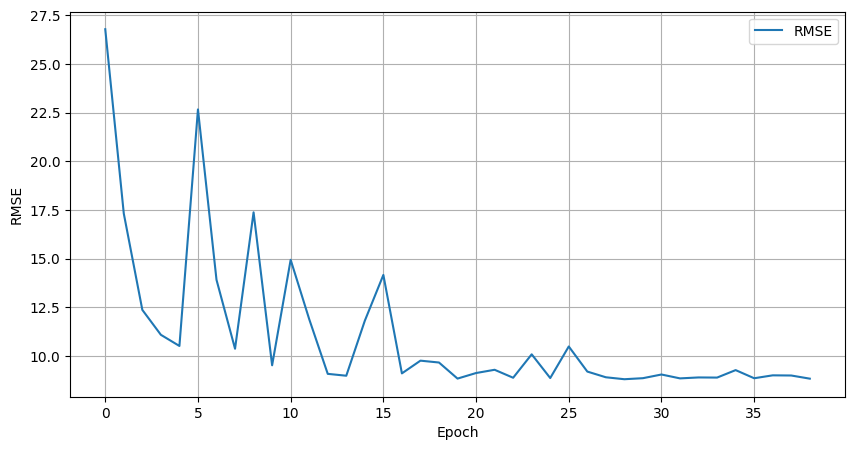

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(valid_rmses, label='RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()

# Эксперимент 6

In [180]:
BATCH_SIZE = 128
EPOCHS = 70
LEARNING_RATE = 0.01
PATIENCE = 10

In [181]:
class ModelSix(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(90, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.act1 = nn.LeakyReLU()
        self.dropout = nn.Dropout(0.1)

        self.layer2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.act2 = nn.LeakyReLU()

        self.layer3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.act3 = nn.LeakyReLU()

        self.output = nn.Linear(64, 1)

    def forward(self, x):
        x = self.dropout(self.act1(self.bn1(self.layer1(x))))
        x = self.act2(self.bn2(self.layer2(x)))
        x = self.act3(self.bn3(self.layer3(x)))
        x = self.output(x)
        return x

In [182]:
model = ModelSix().to(device)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.MSELoss()

In [183]:
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=EPOCHS)

In [184]:
train_losses, train_rmses, valid_losses, valid_rmses, lr_history = train(model, optimizer, criterion, train_loader, test_loader, scheduler, patience=PATIENCE)

  1%|▏         | 1/70 [00:13<15:03, 13.09s/it]

EPOCH 0, train_loss: 215879.8053, train_rmse: 464.6287, valid_loss: 1413.3070, valid_rmse: 37.5940, lr: 0.009994965332706574


 16%|█▌        | 11/70 [02:26<13:04, 13.29s/it]

EPOCH 10, train_loss: 88.5565, train_rmse: 9.4104, valid_loss: 82.4380, valid_rmse: 9.0795, lr: 0.009402977659283692


 30%|███       | 21/70 [04:42<10:56, 13.40s/it]

EPOCH 20, train_loss: 79.4633, train_rmse: 8.9142, valid_loss: 80.1347, valid_rmse: 8.9518, lr: 0.007938926261462368


 44%|████▍     | 31/70 [06:57<08:41, 13.37s/it]

EPOCH 30, train_loss: 74.8954, train_rmse: 8.6542, valid_loss: 78.0869, valid_rmse: 8.8367, lr: 0.005892784473993186


 51%|█████▏    | 36/70 [08:17<07:49, 13.82s/it]

Early stopping at epoch 36


In [185]:
rmse = valid_rmses[-1]
print(f'RMSE {rmse:.4f}')

RMSE 8.9673


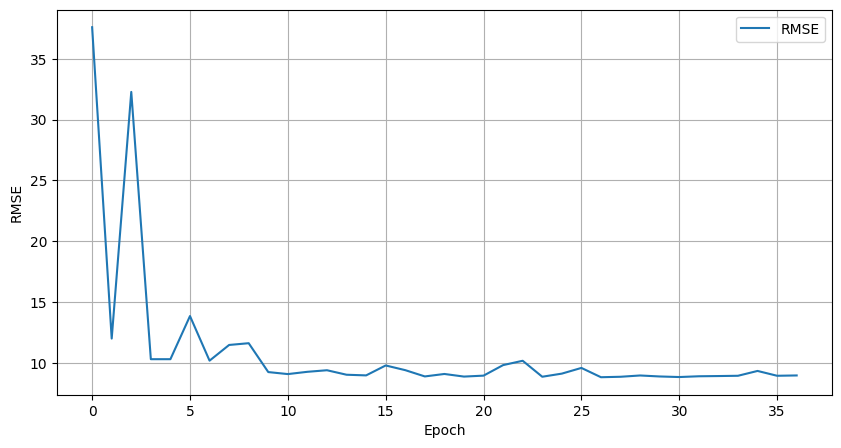

In [186]:
plt.figure(figsize=(10, 5))
plt.plot(valid_rmses, label='RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()

# Эксперимент 7

In [220]:
BATCH_SIZE = 128
EPOCHS = 70
LEARNING_RATE = 0.01
PATIENCE = 15

In [221]:
class ModelSeven(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(90, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.act1 = nn.LeakyReLU()
        self.dropout1 = nn.Dropout(0.2)

        self.layer2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.act2 = nn.LeakyReLU()
        self.dropout2 = nn.Dropout(0.2)  # добавил Dropout

        self.layer3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.act3 = nn.LeakyReLU()

        self.output = nn.Linear(64, 1)

    def forward(self, x):
        x = self.dropout1(self.act1(self.bn1(self.layer1(x))))
        x = self.dropout2(self.act2(self.bn2(self.layer2(x))))
        x = self.act3(self.bn3(self.layer3(x)))
        x = self.output(x)
        return x

In [222]:
model = ModelSeven().to(device)
optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-4) # AdamW и добавил weight_decay
criterion = nn.MSELoss()

In [223]:
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50)

In [224]:
train_losses, train_rmses, valid_losses, valid_rmses, lr_history = train(model, optimizer, criterion, train_loader, test_loader, scheduler, patience=PATIENCE)

  1%|▏         | 1/70 [00:16<19:03, 16.57s/it]

EPOCH 0, train_loss: 217504.2363, train_rmse: 466.3735, valid_loss: 131.1194, valid_rmse: 11.4507, lr: 0.009990133642141357


 16%|█▌        | 11/70 [02:32<13:29, 13.73s/it]

EPOCH 10, train_loss: 82.8561, train_rmse: 9.1025, valid_loss: 83.0528, valid_rmse: 9.1133, lr: 0.008852566213878947


 30%|███       | 21/70 [04:48<11:01, 13.51s/it]

EPOCH 20, train_loss: 76.9451, train_rmse: 8.7718, valid_loss: 76.5907, valid_rmse: 8.7516, lr: 0.006243449435824274


 44%|████▍     | 31/70 [07:04<08:49, 13.58s/it]

EPOCH 30, train_loss: 73.2588, train_rmse: 8.5591, valid_loss: 78.1920, valid_rmse: 8.8426, lr: 0.0031593772365766134


 59%|█████▊    | 41/70 [09:21<06:33, 13.56s/it]

EPOCH 40, train_loss: 70.7589, train_rmse: 8.4118, valid_loss: 76.2385, valid_rmse: 8.7315, lr: 0.000778360372489926


 73%|███████▎  | 51/70 [11:41<04:47, 15.15s/it]

EPOCH 50, train_loss: 69.7362, train_rmse: 8.3508, valid_loss: 76.1697, valid_rmse: 8.7275, lr: 9.866357858642205e-06


 87%|████████▋ | 61/70 [14:12<02:04, 13.84s/it]

EPOCH 60, train_loss: 70.5013, train_rmse: 8.3965, valid_loss: 76.0234, valid_rmse: 8.7191, lr: 0.0011474337861210535


100%|██████████| 70/70 [16:14<00:00, 13.92s/it]


In [225]:
rmse = valid_rmses[-1]
print(f'RMSE {rmse:.4f}')

RMSE 8.7340


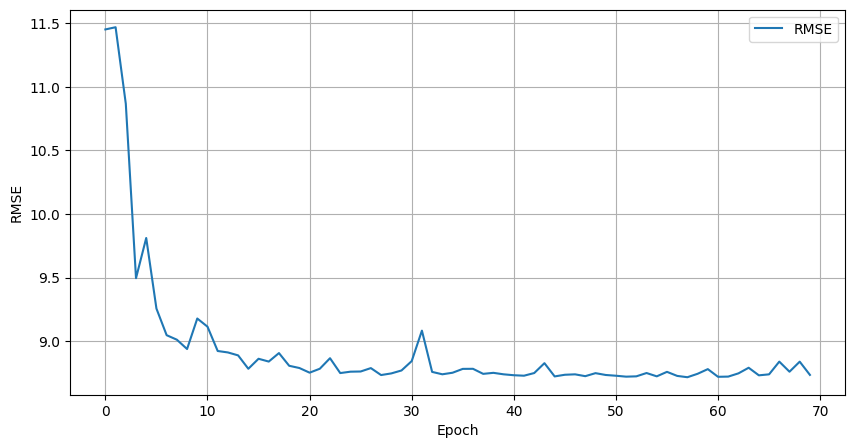

In [226]:
plt.figure(figsize=(10, 5))
plt.plot(valid_rmses, label='RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()
















## 7.1

In [240]:
BATCH_SIZE = 128
EPOCHS = 70
LEARNING_RATE = 0.05 # увеличил
PATIENCE = 15

In [241]:
class ModelSeven(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(90, 256)
        self.bn1 = nn.BatchNorm1d(256)
        self.act1 = nn.LeakyReLU()
        self.dropout1 = nn.Dropout(0.2)

        self.layer2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.act2 = nn.LeakyReLU()
        self.dropout2 = nn.Dropout(0.2)

        self.layer3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.act3 = nn.LeakyReLU()

        self.output = nn.Linear(64, 1)

    def forward(self, x):
        x = self.dropout1(self.act1(self.bn1(self.layer1(x))))
        x = self.dropout2(self.act2(self.bn2(self.layer2(x))))
        x = self.act3(self.bn3(self.layer3(x)))
        x = self.output(x)
        return x

In [242]:
model = ModelSeven().to(device)
optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-4)
criterion = nn.MSELoss()

In [243]:
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50)

In [244]:
train_losses, train_rmses, valid_losses, valid_rmses, lr_history = train(model, optimizer, criterion, train_loader, test_loader, scheduler, patience=PATIENCE)

  1%|▏         | 1/70 [00:13<15:36, 13.57s/it]

EPOCH 0, train_loss: 52335.5583, train_rmse: 228.7697, valid_loss: 164.9291, valid_rmse: 12.8425, lr: 0.04995066821070679


 16%|█▌        | 11/70 [02:32<13:37, 13.86s/it]

EPOCH 10, train_loss: 86.6958, train_rmse: 9.3111, valid_loss: 87.6886, valid_rmse: 9.3642, lr: 0.04426283106939473


 30%|███       | 21/70 [04:49<11:10, 13.68s/it]

EPOCH 20, train_loss: 80.9489, train_rmse: 8.9972, valid_loss: 76.9616, valid_rmse: 8.7728, lr: 0.03121724717912136


 44%|████▍     | 31/70 [07:05<08:52, 13.65s/it]

EPOCH 30, train_loss: 74.6687, train_rmse: 8.6411, valid_loss: 77.7053, valid_rmse: 8.8151, lr: 0.01579688618288306


 59%|█████▊    | 41/70 [09:22<06:36, 13.66s/it]

EPOCH 40, train_loss: 70.4940, train_rmse: 8.3961, valid_loss: 77.9953, valid_rmse: 8.8315, lr: 0.0038918018624496285


 73%|███████▎  | 51/70 [11:39<04:18, 13.62s/it]

EPOCH 50, train_loss: 68.3575, train_rmse: 8.2679, valid_loss: 75.9461, valid_rmse: 8.7147, lr: 4.933178929321103e-05


 80%|████████  | 56/70 [13:00<03:15, 13.95s/it]

Early stopping at epoch 56


In [245]:
rmse = valid_rmses[-1]
print(f'RMSE {rmse:.4f}')

RMSE 8.7277


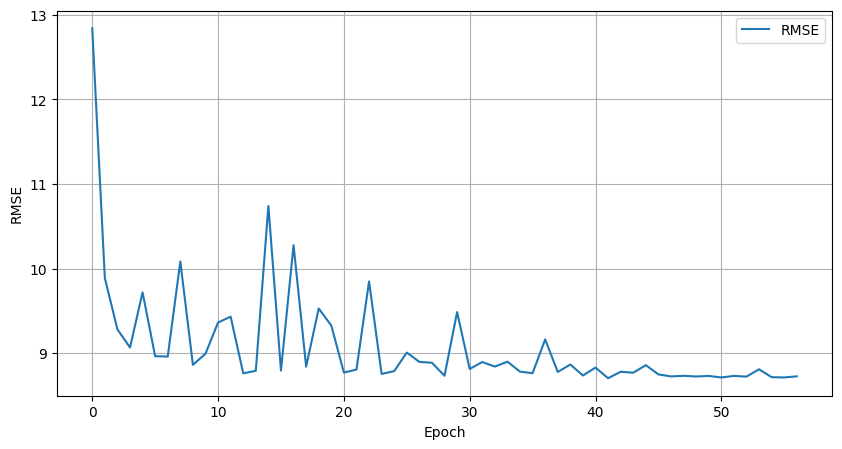

In [247]:
plt.figure(figsize=(10, 5))
plt.plot(valid_rmses, label='RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.show()

## Задание 2. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Напишите небольшой отчет о том, как вы добились полученного качества: какие средства использовали и какие эксперименты проводили. Подробно расскажите об архитектурах и значениях гиперпараметров, а также какие метрики на тесте они показывали. Чтобы отчет был зачтен, необходимо привести хотя бы 3 эксперимента.

### Предобработка данных
#### Масштабирование
Масштабировал все признаки с помощью StandardScaler.  
#### PCA
Также пробовал применять PCA, оставляя 80%, 90% или 95% дисперсии, но качество моделей при этом становилось хуже, поэтому решил отказаться от снижения размерности.   

### Эксперимент 1  
Linear(90, 64) → ReLU → Linear(64, 32) → ReLU → Linear(32, 1)  
BATCH_SIZE = 128  
EPOCHS = 50  
LEARNING_RATE = 0.001  
Optimizer: Adam  
Сначала я хотел обучить простую нейронную сеть, чтобы получить базовый результат. Получилось немного хуже бейзлана (9.51), но лучше DummyRegressor (10.85).    
RMSE: 9.6050

### Эксперимент 2
Linear(90, 64) → BatchNorm1d(64) → ReLU → Linear(64, 32) → BatchNorm1d(32) → ReLU → Linear(32, 1)  
Добавил BatchNorm. Качество немного улучшилось.  
RMSE 9.3876  

### Эксперимент 3
Linear(90, 128) → BatchNorm1d(128) → ReLU → Dropout(0.1) → Linear(128, 64) → BatchNorm1d(64) → ReLU → Linear(64, 1)  
Увеличил число нейронов в скрытых слоях. Затем попробовал добавить Dropout, чтобы уменьшить переобучение (наилучший результат был с одним Dropout).  
RMSE 8.9349

### Эксперимент 4
Linear(90, 128) → BatchNorm1d(128) → LeakyReLU → Dropout(0.1) → Linear(128, 64) → BatchNorm1d(64) → LeakyReLU → Linear(64, 1)  
Попробовал заменить ReLU на LeakyReLU. С ним результат немного улучшился.  
RMSE 8.9099

### Эксперимент 5
Linear(90, 256) → BatchNorm1d(256) → LeakyReLU → Dropout(0.1) → Linear(256, 128) → BatchNorm1d(128) → LeakyReLU → Linear(128, 64) → BatchNorm1d(64) → LeakyReLU → Linear(64, 1)  
Гиперпараметры: кол-во эпох увеличил до 70 (тк добавил early stopping, чтобы останавливать обучение при отсуствии улучшений), lr=0.01.  
Добавил еще один слой. Также добавил scheduler (StepLR), чтобы постепенно менять lr.  
RMSE 8.8299  

### Эксперимент 6
Linear(90, 256) → BatchNorm1d(256) → LeakyReLU → Dropout(0.1) → Linear(256, 128) → BatchNorm1d(128) → LeakyReLU → Linear(128, 64) → BatchNorm1d(64) → LeakyReLU → Linear(64, 1)  
Проверил другой scheduler (CosineAnnealingLR). Результат ухудшился  
RMSE 8.9673

### Эксперимент 7 / 7.1
Linear(90, 256) → BatchNorm1d(256) → LeakyReLU → Dropout(0.2) → Linear(256, 128) → BatchNorm1d(128) → LeakyReLU → Dropout(0.2) (ещё один Dropout) → Linear(128, 64) → BatchNorm1d(64) → LeakyReLU → Linear(64, 1)  
Чтобы снизить переобучение, перешел на оптимизатор AdamW с weight_decay и увеличил Dropout.  
RMSE 8.7340  

Попробовал поэкспериментировать с гиперпараметрами, и при lr=0.05 (в 7.1) модель показала немного лучший результат.  
RMSE 8.7277
